In [1]:
%matplotlib inline
import pandas as pd
import requests as req
import io
import zipfile

In [18]:
raw_data = pd.read_csv('LoanStats_2016Q1.csv')
raw_data.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,16000.0,16000.0,16000.0,36 months,5.32%,481.84,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,17000.0,17000.0,17000.0,36 months,9.75%,546.55,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,15000.0,15000.0,15000.0,60 months,15.31%,359.30,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2425.0,2425.0,2425.0,36 months,15.31%,84.44,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,29900.0,29900.0,29900.0,36 months,12.99%,1007.31,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for i in range(0, int(len(raw_data.columns) / 5)):
    print(raw_data.columns[i*5:i*5+5])

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'], dtype='object')
Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade'], dtype='object')
Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status'],
      dtype='object')
Index(['issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc'], dtype='object')
Index(['purpose', 'title', 'zip_code', 'addr_state', 'dti'], dtype='object')
Index(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record'],
      dtype='object')
Index(['open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'], dtype='object')
Index(['initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv'],
      dtype='object')
Index(['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee'],
      dtype='object')
Index(['last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_c

In [20]:
cols = ['id', 'member_id', 'url']

In [21]:
cleaned_data = raw_data.drop(cols, axis=1)
cleaned_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,16000.0,16000.0,16000.0,36 months,5.32%,481.84,A,A1,Security specialist,8 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,17000.0,17000.0,17000.0,36 months,9.75%,546.55,B,B3,Kindergarten Teacher,< 1 year,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,15000.0,15000.0,15000.0,60 months,15.31%,359.30,C,C5,Branch Manager,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,2425.0,2425.0,2425.0,36 months,15.31%,84.44,C,C5,Teacher,5 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,29900.0,29900.0,29900.0,36 months,12.99%,1007.31,C,C2,Executive Chef,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cols = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
        'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'out_prncp', 'out_prncp_inv',
        'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int'
]

In [23]:
data = cleaned_data[cols]
data.head()

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
0,16000.0,16000.0,36 months,5.32%,A,A1,8 years,RENT,105000.0,Not Verified,Mar-2016,Fully Paid,debt_consolidation,0.00,0.00,16098.340000,16098.34,16000.00,98.34
1,17000.0,17000.0,36 months,9.75%,B,B3,< 1 year,MORTGAGE,40000.0,Verified,Mar-2016,Current,credit_card,1856.98,1856.98,16630.580000,16630.58,15143.02,1487.56
2,15000.0,15000.0,60 months,15.31%,C,C5,10+ years,MORTGAGE,70000.0,Source Verified,Mar-2016,Fully Paid,home_improvement,0.00,0.00,17155.045652,17155.05,15000.00,2137.08
3,2425.0,2425.0,36 months,15.31%,C,C5,5 years,MORTGAGE,25000.0,Source Verified,Mar-2016,Fully Paid,credit_card,0.00,0.00,2653.180000,2653.18,2425.00,228.18
4,29900.0,29900.0,36 months,12.99%,C,C2,10+ years,MORTGAGE,68000.0,Verified,Mar-2016,Late (31-120 days),credit_card,17215.02,17215.02,17081.110000,17081.11,12684.98,4396.13


In [24]:
data = data[data.term.notnull()]
data['year'] = 2016
data['quarter'] = 1

In [25]:
data.term = data.term.apply(lambda x: int(str(x).split()[0]))
data.int_rate = data.int_rate.apply(lambda x: float(x.replace('%','')) / 100)
data['verified_inc'] = data.verification_status.apply(lambda x: x == 'Verified')
data['verified_job'] = data.verification_status.apply(lambda x: x == 'Source Verified')
data['defaulted'] = data.loan_status.apply(lambda x: x in ['Charged Off', 'Default'])
data.head()

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,year,quarter,verified_inc,verified_job
0,16000.0,16000.0,36,0.0532,A,A1,8 years,RENT,105000.0,Not Verified,...,0.00,0.00,16098.340000,16098.34,16000.00,98.34,2016,1,False,False
1,17000.0,17000.0,36,0.0975,B,B3,< 1 year,MORTGAGE,40000.0,Verified,...,1856.98,1856.98,16630.580000,16630.58,15143.02,1487.56,2016,1,True,False
2,15000.0,15000.0,60,0.1531,C,C5,10+ years,MORTGAGE,70000.0,Source Verified,...,0.00,0.00,17155.045652,17155.05,15000.00,2137.08,2016,1,False,True
3,2425.0,2425.0,36,0.1531,C,C5,5 years,MORTGAGE,25000.0,Source Verified,...,0.00,0.00,2653.180000,2653.18,2425.00,228.18,2016,1,False,True
4,29900.0,29900.0,36,0.1299,C,C2,10+ years,MORTGAGE,68000.0,Verified,...,17215.02,17215.02,17081.110000,17081.11,12684.98,4396.13,2016,1,True,False


In [26]:
data.home_ownership.value_counts()

MORTGAGE    66829
RENT        50864
OWN         16194
Name: home_ownership, dtype: int64

In [27]:
data.verification_status.value_counts()

Source Verified    50425
Not Verified       47100
Verified           36362
Name: verification_status, dtype: int64

In [31]:
default_by_ownership = data.groupby('home_ownership')\
.agg({
    'term': 'count',
    'defaulted': 'sum'
})\
.reset_index()[['home_ownership', 'term', 'defaulted']]
default_by_ownership.columns = ['ownership', 'loan_count', 'default_count']
default_by_ownership.head()

,ownership,loan_count,default_count
0,MORTGAGE,66829,5423.0
1,OWN,16194,1569.0
2,RENT,50864,6062.0


In [32]:
default_by_ownership['default_rate'] = default_by_ownership.default_count / default_by_ownership.loan_count
default_by_ownership.head()

,ownership,loan_count,default_count,default_rate
0,MORTGAGE,66829,5423.0,0.081147
1,OWN,16194,1569.0,0.096888
2,RENT,50864,6062.0,0.119181


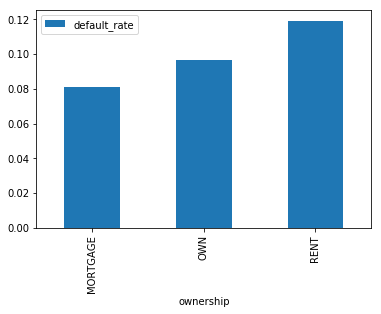

In [33]:
default_by_ownership.plot.bar(x='ownership', y='default_rate')

In [34]:
default_by_own_term = data.groupby(['home_ownership', 'term'])\
.agg({
    'loan_amnt': 'count',
    'defaulted': 'sum'
}).reset_index()[['home_ownership', 'term', 'loan_amnt', 'defaulted']]
default_by_own_term.columns = ['own', 'term', 'loan_count', 'default_count']
default_by_own_term.head()

,own,term,loan_count,default_count
0,MORTGAGE,36,45150,3185.0
1,MORTGAGE,60,21679,2238.0
2,OWN,36,12077,1062.0
3,OWN,60,4117,507.0
4,RENT,36,38893,4084.0


In [35]:
default_by_own_term['default_rate'] = default_by_own_term.default_count / default_by_own_term.loan_count

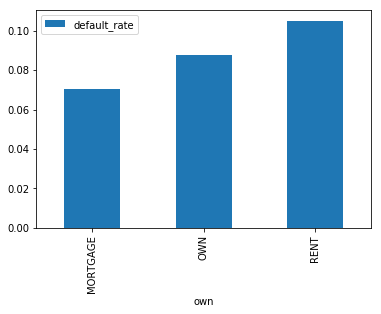

In [36]:
default_by_own_term[default_by_own_term.term == 36].plot.bar(x='own', y='default_rate')

In [37]:
sub_data = data[['sub_grade', 'term', 'home_ownership', 'defaulted']]
sub_data.head()

,sub_grade,term,home_ownership,defaulted
0,A1,36,RENT,False
1,B3,36,MORTGAGE,False
2,C5,60,MORTGAGE,False
3,C5,36,MORTGAGE,False
4,C2,36,MORTGAGE,False


In [38]:
grade_default = sub_data[sub_data.term == 36]\
.groupby(['sub_grade', 'home_ownership'])\
.agg({
    'term': 'count',
    'defaulted': 'sum'
}).reset_index()[['sub_grade', 'home_ownership', 'term', 'defaulted']]
grade_default.columns = ['sub_grade', 'own', 'loan_count', 'default_count']
grade_default.head()

,sub_grade,own,loan_count,default_count
0,A1,MORTGAGE,4962,50.0
1,A1,OWN,1042,14.0
2,A1,RENT,2025,24.0
3,A2,MORTGAGE,2165,62.0
4,A2,OWN,544,21.0


In [39]:
grade_default['default_rate'] = grade_default.default_count / grade_default.loan_count
grade_default.head()

,sub_grade,own,loan_count,default_count,default_rate
0,A1,MORTGAGE,4962,50.0,0.010077
1,A1,OWN,1042,14.0,0.013436
2,A1,RENT,2025,24.0,0.011852
3,A2,MORTGAGE,2165,62.0,0.028637
4,A2,OWN,544,21.0,0.038603


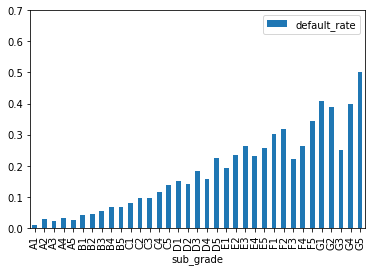

In [40]:
grade_default[grade_default.own == 'MORTGAGE'].plot.bar(x='sub_grade', y='default_rate', ylim=(0, 0.7))

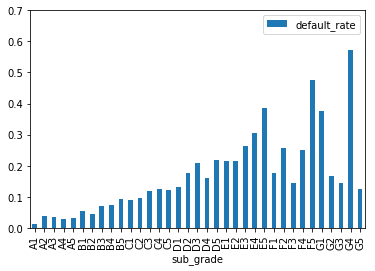

In [41]:
grade_default[grade_default.own == 'OWN'].plot.bar(x='sub_grade', y='default_rate', ylim=(0, 0.7))

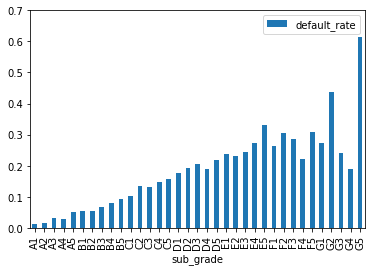

In [42]:
grade_default[grade_default.own == 'RENT'].plot.bar(x='sub_grade', y='default_rate', ylim=(0, 0.7))

In [43]:
grade_default.groupby('own')\
.agg({
    'default_rate': 'mean'
}).reset_index()

,own,default_rate
0,MORTGAGE,0.181294
1,OWN,0.171267
2,RENT,0.188479


In [44]:
max_default = 0.1

In [45]:
filtered_grade = grade_default[grade_default.default_rate < max_default]
filtered_grade.head()

,sub_grade,own,loan_count,default_count,default_rate
0,A1,MORTGAGE,4962,50.0,0.010077
1,A1,OWN,1042,14.0,0.013436
2,A1,RENT,2025,24.0,0.011852
3,A2,MORTGAGE,2165,62.0,0.028637
4,A2,OWN,544,21.0,0.038603


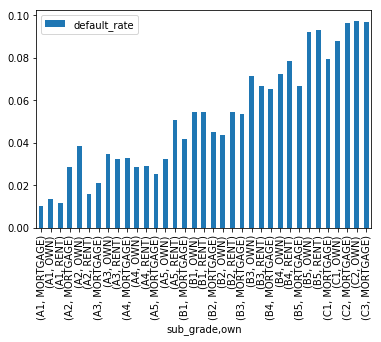

In [46]:
filtered_grade.plot.bar(x=['sub_grade', 'own'], y='default_rate')

In [47]:
filtered_grade.groupby('own')\
.agg({
    'default_rate': 'mean'
}).reset_index()

,own,default_rate
0,MORTGAGE,0.051024
1,OWN,0.055563
2,RENT,0.048673


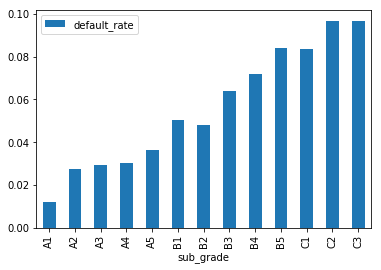

In [48]:
filtered_grade.groupby('sub_grade')\
.agg({
    'default_rate': 'mean'
}).reset_index().plot.bar(x='sub_grade', y='default_rate')

In [53]:
income = data[data.verified_inc]

In [55]:
income.annual_inc.max()

3300000.0